# EXPLORACIÓN DE LOS DATOS ORIGINALES

> Projecto de exploracion de datos historicos de partidos de futbol para la predicción de resultados futuros.

- toc: true
- badges: true
- comments: false
- categories: {Data Science, Football, Python}
- image: images/N1.png

In [1]:
# some imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings('ignore')

**Importamos la librería de funciones desarrolladas para este proyecto**

In [2]:
import nbimporter
import importlib

In [3]:
import Functions_for_FMP as fffmp

In [4]:
importlib.reload(fffmp)
import Functions_for_FMP as fffmp

## Carga de los datos Originales

In [5]:
FMP = pd.read_csv('Dataset/train.csv',index_col=False)

In [6]:
display(FMP)

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

### Descripción de las Variables del *Dataset*

#### 1) Variables referentes al partido a predecir

**target - The variable you have to predict the probabilities only available in the train set.**

home_team_name - The name of the Home the team. Hidden in test set, see this discussion

away_team_name - The name of the Away the team. Hidden in test set, see this discussion

match_date - The match date (UTC).

league_name - The league name.

league_id - The league id. Note that league names can be identical for two differents id.

is_cup - If the value is 1 the match is played for a cup compettion.

home_team_coach_id - The id of the Home team coach.

away_team_coach_id - The id of the Away team coach.

#### 2) Variables referentes a partidos anteriores para el equipo LOCAL

home_team_history_match_date_{i} - The date of the last i-th match played by Home team.

home_team_history_is_play_home_{i} - If 1, the Home team played home.

home_team_history_is_cup_{i} - If 1, the match was a cup competition.

home_team_history_goal_{i} - The number of goals scored by the Home team on its last i-th match.

home_team_history_opponent_goal_{i} - The number of goals conceded by the Home team on its last i-th match.

home_team_history_rating_{i} - The rating of the Home team on its last i-th match (pre match rating).

home_team_history_opponent_rating_{i} - The rating of the opponent team on Home team last i-th match (pre match rating).

home_team_history_coach_{i} - The coach id of the Home team on its last i-th match.

home_team_history_league_id_{i}

#### 3) Variables referentes a partidos anteriores para el equipo VISITANTE

away_team_history_match_date_{i} - The date of the last i-th match played by Away team.

away_team_history_is_play_home_{i} - If 1, the Away team played home.

away_team_history_is_cup_{i} - If 1, the match was a cup competition.

away_team_history_goal_{i} - The number of goals scored by the Away team on its last i-th match.

away_team_history_opponent_goal_{i} - The number of goals conceded by the Away team on its last i-th match.

away_team_history_rating_{i} - The rating of the Away team on its last i-th match (pre match rating).

away_team_history_opponent_rating_{i} - The rating of the opponent team on Away team last i-th match (pre match rating).

away_team_history_coach_{i} - The coach id of the Away team on its last i-th match.

away_team_history_league_id_{i} - The league name id played by the Away on its last i-th match.

In [7]:
fffmp.check_NaNs(FMP)

home_team_name   Nulls: 1 / 110938 - 0.0%
away_team_name   Nulls: 1 / 110938 - 0.0%
league_name   Nulls: 1 / 110938 - 0.0%
is_cup   Nulls: 1 / 110938 - 0.0%
home_team_coach_id   Nulls: 21721 / 110938 - 19.58%
away_team_coach_id   Nulls: 21815 / 110938 - 19.66%
home_team_history_match_date_1   Nulls: 1159 / 110938 - 1.04%
home_team_history_match_date_2   Nulls: 2451 / 110938 - 2.21%
home_team_history_match_date_3   Nulls: 3773 / 110938 - 3.4%
home_team_history_match_date_4   Nulls: 5101 / 110938 - 4.6%
home_team_history_match_date_5   Nulls: 6477 / 110938 - 5.84%
home_team_history_match_date_6   Nulls: 7896 / 110938 - 7.12%
home_team_history_match_date_7   Nulls: 9295 / 110938 - 8.38%
home_team_history_match_date_8   Nulls: 10719 / 110938 - 9.66%
home_team_history_match_date_9   Nulls: 12136 / 110938 - 10.94%
home_team_history_match_date_10   Nulls: 13559 / 110938 - 12.22%
home_team_history_is_play_home_1   Nulls: 1159 / 110938 - 1.04%
home_team_history_is_play_home_2   Nulls: 2451 / 11

away_team_history_league_id_8   Nulls: 11295 / 110938 - 10.18%
away_team_history_league_id_9   Nulls: 12762 / 110938 - 11.5%
away_team_history_league_id_10   Nulls: 14216 / 110938 - 12.81%

total missing values: 1717256


Nota: Vemos que el procentaje de valores faltantes es aproximadamente el mismo en función de *i*

Veamos el como son los valores:

In [8]:
FMP.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_opponent_goal_1,away_team_history_opponent_goal_2,away_team_history_opponent_goal_3,away_team_history_opponent_goal_4,away_team_history_opponent_goal_5,away_team_history_opponent_goal_6,away_team_history_opponent_goal_7,away_team_history_opponent_goal_8,away_team_history_opponent_goal_9,away_team_history_opponent_goal_10,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_oppon

# Exploración de datos originales

In [9]:
import seaborn as sns
sns.set_theme()

**NOTA:** Haremos este análisis antes de reemplazar *missing values* para evitar distorsionar la estadística del *dataset*.

Lo que haremos es tratar de juntar las *features* que corresponden a mismos fenomenos. Luego juntaremos los datos historicos y de "visitante" (*Away*) y "local" (*home*). Esto nos permitirá visualizar la información que tenemos de una manera más abarcable. Creemos que esto no es un problema ya que no esperamos tendencias temporales en el dataset completo (si que las podría haber para equipos en particular, pero al mezclarlos y mezclar distintas ligas esa información ya se pierde). 

**1) GOLES ANOTADOS**

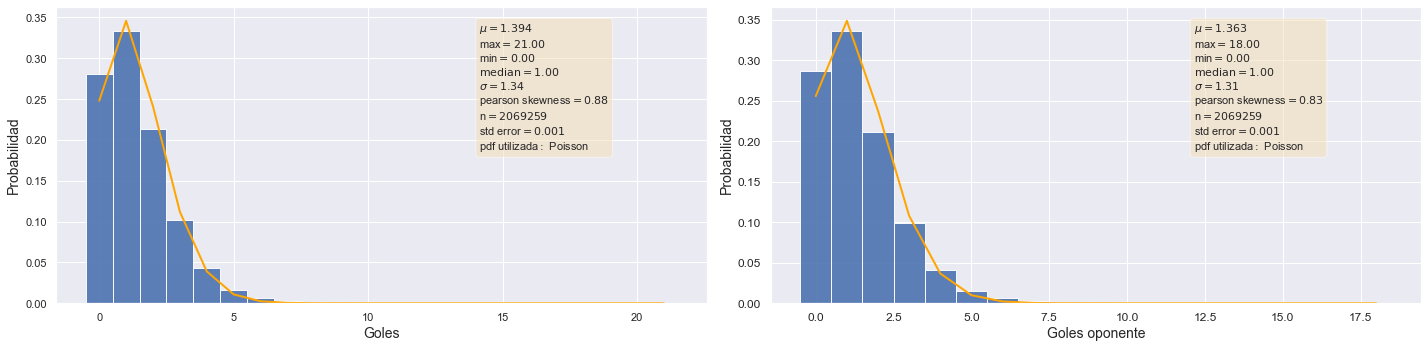

In [10]:
columns=2
rows=1
Features=['team_history_goal','team_history_opponent_goal']
Type=['historic','historic']
n_bin=[np.arange(0,21+2)-0.5,np.arange(0,18+2)-0.5]
Dist=['Poisson','Poisson']
y_label=['Probabilidad','Probabilidad']
x_label=['Goles','Goles oponente']
alignment=['mid','mid']
fffmp.Plot_distributions(FMP,columns,rows,Features,Type,n_bin,Dist,x_label,y_label,alignment)

Las distribucion de goles anotados por los equipos y sus oponentes se asemejan bastante, como era de esperar.  En ambos casos tenemos una media de aproximadamente 1.4 goles/partido.
La naturaleza del fenómeno, asi como la semejanza entre el valor de la desviación estándar y la media, sugieren que la cantidad de goles sigue una distribución de Poisson, tal como se puede apreciar en el grafico (allí se usa como parámetro $\lambda= \mu$).

Dado que se trata estadísticamente del mismo "fenómeno" podemos juntar ambos conjuntos de datos. Describiéndolos nuevamente con una distribución de Poisson.

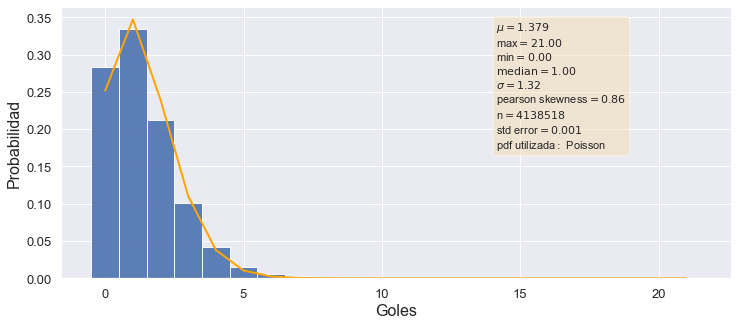

In [11]:
Features=['team_history_goal','team_history_opponent_goal']
Type=['historic','historic']
n_bin=np.arange(0,21+2)-0.5
Dist='Poisson'
y_label='Probabilidad'
x_label='Goles'
alignment='mid'
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment)

**2) RATING**

El *rating* es una suerte de fortaleza relativa determinada **antes** de cda partido. Mirando a la diferencia entre los valores para un equipo y su rival, podemos tener información de quien es el "favorito" a ganar

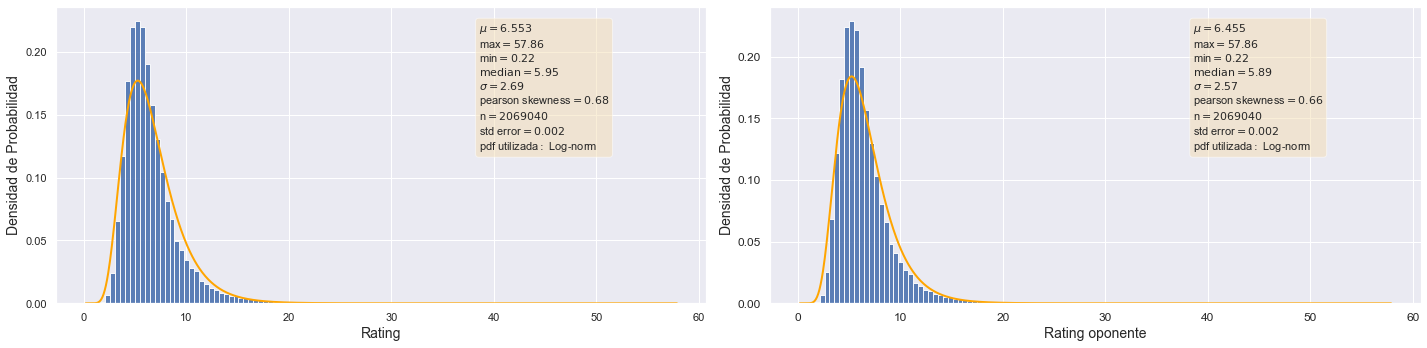

In [12]:
columns=2
rows=1
Features=['team_history_rating','team_history_opponent_rating']
Type=['historic','historic']
n_bin=[120,120]
Dist=['Log-norm','Log-norm']
y_label=['Densidad de Probabilidad','Densidad de Probabilidad']
x_label=['Rating','Rating oponente']
alignment=['mid','mid']
fffmp.Plot_distributions(FMP,columns,rows,Features,Type,n_bin,Dist,x_label,y_label,alignment)

Aqui podemos ver nuevmente que no hay una diferencia entre los equipos y sus oponentes (al menos viendo todo el conjunto). Los equipos tienen un *rating* medio de 6.45, y como se puede ver la distribución de *ratings* es asimétrica. No tengo información clara al respecto, pero parecería tomar solo valores mayores a cero. 


La naturaleza de la distribución es más dificil de anticipar. uno podría eperar que haya menos casos de equipos "muy buenos", como se ve. Esto, más el hecho de estar definida en el dominio de los reales positivos, anima a pensar en una distribución log-normal. Como se ve, la distribución propuesta tiene algunas similiude con el histograma de los datos, pero falla en la amplitud.

A cotinuación hacemos un proceso similar para el conjunto completo

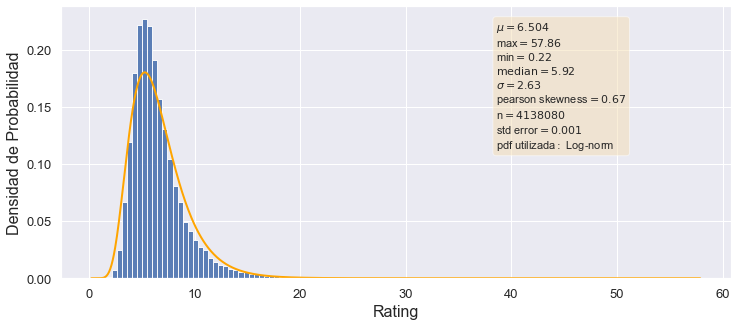

In [13]:
Features=['team_history_rating','team_history_opponent_rating']
Type=['historic','historic']
n_bin=120
Dist='Log-norm'
y_label='Densidad de Probabilidad'
x_label='Rating'
alignment='mid'
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment)

Si bien el *rating* se calcula para cada partido como una suerte de fortaleza relativa a priori. Un mismo equipo luego podrá tener distintos *ratings* dependiendo del rival. 

Miremos los equipos con mayor valor medio para los partidos en el *dataset*:

In [14]:
Numero_de_equipos=10
fffmp.Best_rating_teams(FMP,Numero_de_equipos)

Todas las Ligas del Dataset



,Rating
Equipo,
Myanmar W,45.495250
Haiti U21,25.943576
Mexico U20 W,25.750481
FC Deccan,25.524542
Dinamo-BGU W,24.441718
Nicaragua U20,21.783200
La Massana,20.978900
United States U20,20.592331
Sundby W,20.587300


Como vemos, un valor medio de ese *rating* no tiene sentido al mirar todas las ligas juntas, ya que para que ese valor medio tenga sentido, los equipos tienen que enfrentarse a mismos rivales. Esto, es, deben estar en una misma liga.

Si vemos ligas por separado:

In [15]:
Numero_de_equipos=10
league_id=[636,'Superliga_Argentina']
fffmp.Best_rating_teams(FMP,Numero_de_equipos,league_id)

Liga: Superliga_Argentina


,Rating
Equipo,
River Plate,8.454110
Boca Juniors,7.428697
Vélez Sarsfield,6.266595
Racing Club,6.148498
Independiente,6.011084
Lanús,5.871077
Defensa y Justicia,5.778136
San Lorenzo,5.574948
Banfield,5.509771


In [16]:
Numero_de_equipos=10
league_id=[564,'La Liga Española']
fffmp.Best_rating_teams(FMP,Numero_de_equipos,league_id)

Liga: La Liga Española


,Rating
Equipo,
Barcelona,10.424925
Real Madrid,9.436574
Sevilla,7.614321
Atlético Madrid,7.359869
Villarreal,7.262762
Real Sociedad,6.810394
Real Betis,5.990964
Celta de Vigo,5.976304
Valencia,5.927463


Al menos el orden dentro de las ligas tiene sentido (sobretodo el primer puesto está bien asignado =D )

**3) CORRELACION GOLES ANOTADOS VS RANKING**

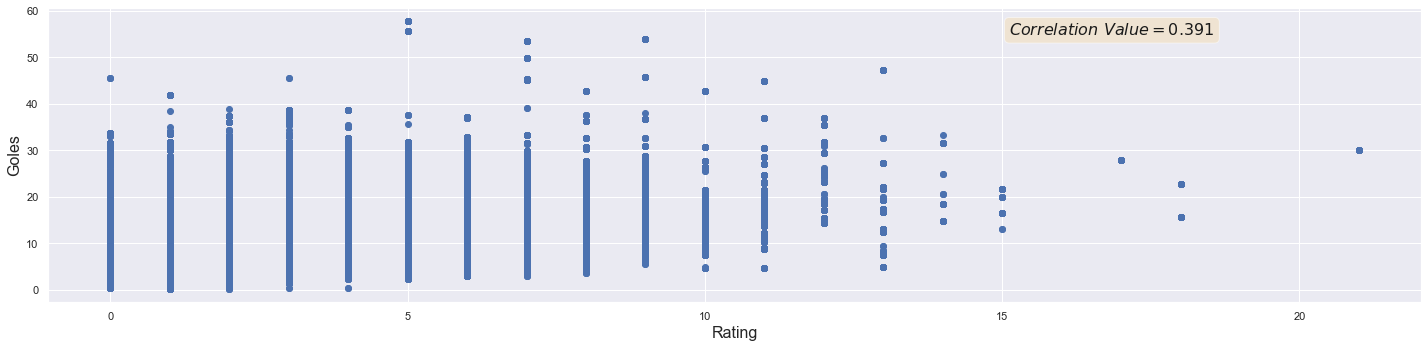

In [17]:
Y_feature=['team_history_rating','team_history_opponent_rating']
X_feature=['team_history_goal','team_history_opponent_goal']
Plot_labels=['Rating','Goles']
fffmp.Correlacion_X_vs_Y_his(FMP,X_feature,Y_feature,Plot_labels)

Si bien no es muy claro en el grafico, efectivamente hay una correlación. Equipos más "favoritos" tienden a marcar más goles.

**4) DISTRIBUCION DE VICTORIAS, EMPATES Y DERROTAS**

Veamos ahora la influencia de la localía en el resultado.

Separaremos los resultados en tres grupos: General, Liga, Copa. La razón detrás de ello es que los partidos de copa pueden ser a veces en territorio neutral. Por otro lado, los incentivos para ir a por la victoria o el empate pueden ser diferentes en partidos de eliminación.

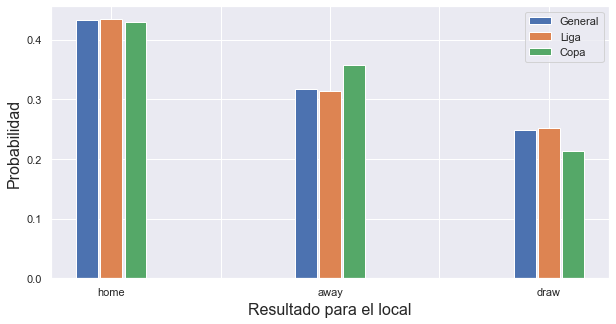

In [18]:
fffmp.Plot_Outcome_para_copa_y_liga(FMP)

Aqui podemos observar diferentes cosas (al menos para este dataset):
* 1) La localia representa una clara ventaja
* 2) Es mucho más probable ver un ganador (*away*/*home*) que un empate.
* 3) En los partidos de copa se registran menos empates.

**5) VENTAJA LOCALIA**

Podemos explorar un poco más este aspecto graficando la distribución para el equipo local vs visitante

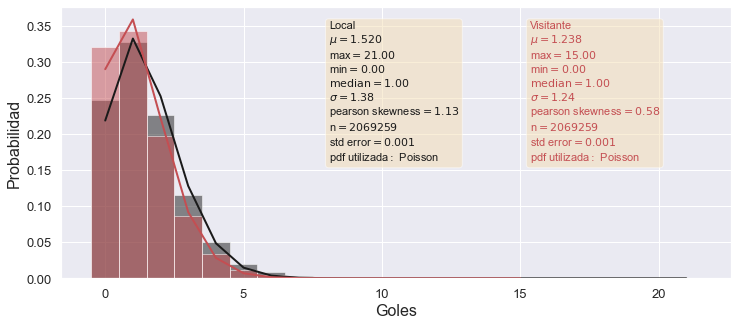

In [19]:
Features_Team='team_history_goal'
Features_Opponent='team_history_opponent_goal'
Condition='team_history_is_play_home'
n_bin_local=np.arange(0,21+2)-0.5
n_bin_visitante=np.arange(0,15+2)-0.5
n_bin=[n_bin_local,n_bin_visitante]
Dist='Poisson'
y_label='Probabilidad'
x_label='Goles'
alignment='mid'
Cond_Labels=['Local','Visitante']
fffmp.Plot_distribution_por_Condicion_team_and_opp(FMP,Features_Team,Features_Opponent,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment)

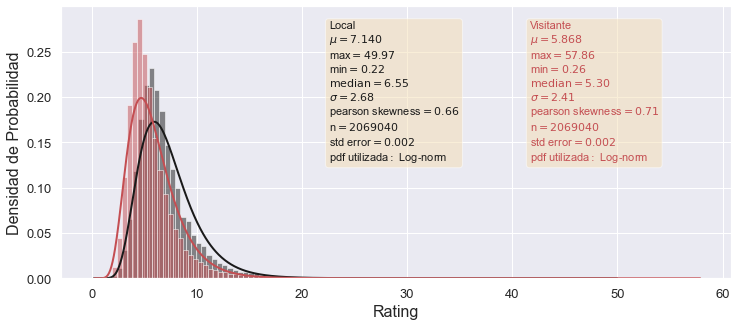

In [20]:
Features_Team='team_history_rating'
Features_Opponent='team_history_opponent_rating'
Condition='team_history_is_play_home'
n_bin_local=100
n_bin_visitante=120
n_bin=[n_bin_local,n_bin_visitante]
Dist='Log-norm'
y_label='Densidad de Probabilidad'
x_label='Rating'
alignment='left'
Cond_Labels=['Local','Visitante']
fffmp.Plot_distribution_por_Condicion_team_and_opp(FMP,Features_Team,Features_Opponent,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment)

La diferencia entre los goles de los locales y de los visitantes, refueza la teoría d eque la localía tiene un impacto en el resultado. Sin embargo, el hecho de que esa diferencia se vea en el *rating* es algo para tomar con pinzas. Si se considera la localía en el *rating*, entonces no es llamativo.  Sin embargo, de forma contraria, si no se lo considera lo que vimos en la diferencia de goles puede estar relacionado a un imbalance entre la "calidad" de los equipos que jugan de local y visitante en el datset. Dato que el *rating* se calcula para cada partido, creo que es muy probable que se tenga en cuenta la localía. 

**6) LIGA VS COPA**

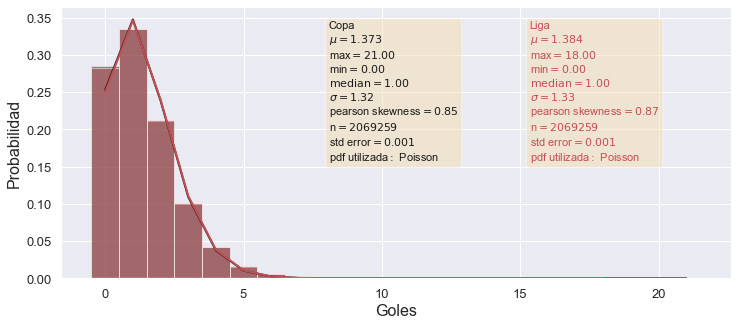

In [21]:
Features_Team='team_history_goal'
Features_Opponent='team_history_opponent_goal'
Condition='team_history_is_cup'
n_bin_copa=np.arange(0,21+2)-0.5
n_bin_liga=np.arange(0,18+2)-0.5
n_bin=[n_bin_copa,n_bin_liga]
Dist='Poisson'
y_label='Probabilidad'
x_label='Goles'
alignment='mid'
Cond_Labels=['Copa','Liga']
fffmp.Plot_distribution_por_Condicion_team_and_opp(FMP,Features_Team,Features_Opponent,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment)

Podemos decir que, en la practica, no afecta a la cantidad de goles el hecho que sea un partido de copa o de liga

**7) VENTANA DE TIEMPO DEL DATASET**

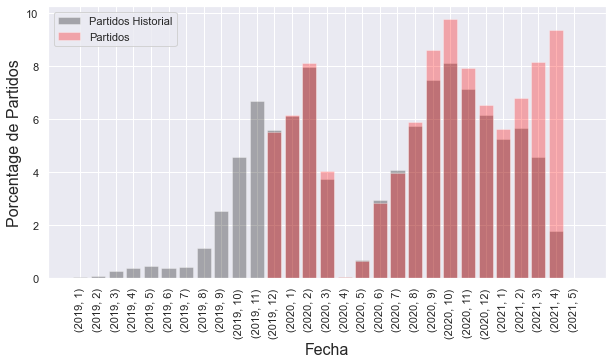

In [22]:
fffmp.Match_dates_histograms(FMP)